Esse dataset eu peguei no kaggle, para enteder melhor os dados leia mais sobre o dataset [aqui](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries). Vamos utilizar esse dataset na maioria dos exemplos.

In [2]:
# Importando a biblioteca pandas
import pandas as pd 

# Importando o dataset
salarios_df = pd.read_csv('base-de-dados/ds_salaries.csv', index_col=0) 

# 🔺 Medidas de dispersão

<br>
As medidas de dispersão são métodos estatísticos usados para determinar o grau de variança dos valores de um conjunto de dados. A utilização desses métodos tornam a análise de uma amostra mais confiável, visto que as medidas de tendência central muitas vezes escondem a homogeneidade dos dados.<br><br>

## 🔹 Amplitude

Essa medida é calculada subtraindo o menor valor do maior valor de um conjunto de dados. Por ser uma medida que não leva em consideração como os dados estão efetivamente distribuídos, não é muito utilizada.

Vamos calcular a amplitude da coluna **salary_in_usd**.

In [83]:
# importando a biblioteca pandas
import pandas as pd 

# calculando a amplitude da coluna salary_in_usd
amplitude = salarios_df['salary_in_usd'].max()-salarios_df['salary_in_usd'].min()

print(f'A amplitude da coluna é {amplitude}, a medida é em dólares.')

A amplitude da coluna é 597141, a medida é em dólares.


## 🔹 Variança

A variância é uma medida de dispersão dos dados, mede o quão afastados os dados estão da média. Quanto maior a variância, mais afastados os dados encontram-se da média. A fórmula que usamos para calcular a variança depende de os dados estarem sendo considerados como a população ou se está apenas representando uma amostra de uma população.<br>


### Formula para calcular a variança populacional:
Se formos calcular a variança de uma população, dividimos pelo número de dados, **N**.

![s](http://4.bp.blogspot.com/-qe1uJVtxeP8/ToK4OCpQBYI/AAAAAAAAABI/k99zMGW49nE/s1600/007.png)

<br><br>

### Formula para calcular a variança amostral:
Se formos calcular a variança de uma amostra, dividimos pelo número de dados da amostra menos um, **N-1**.

![x](https://35jqd11ssl2r3np6aoixp3md-wpengine.netdna-ssl.com/wp-content/uploads/2018/02/calculo-variancia.png)

<br><br>


Onde,

σ² ou _s_²: variância<br>
∑: somatorio<br>
xi ou x: valor analisado<br>
x barra: média aritmética do conjunto<br>
n: número de dados do conjunto<br><br>

Passos para encontrar a variança:

- Primeiramente, devemos calcular a média aritmética do conjunto;
- Em seguida, subtraímos de cada valor do conjunto a média calculada e elevamos o resultado ao quadrado;
- Por fim, somamos todos os valores e dividimos pelo quantidade de dados do conjunto (se você tiver calculando a variança de uma amostra deverá dividir por n-1, quantidade de dados do conjunto menos 1);

<br>

Vamos calcular a variança da coluna **salary_in_usd**. Mas poderia ser qualquer coluna, claro, que seja composta por dados quantitativos.

In [184]:
# importando a biblioteca pandas
import pandas as pd

# calculando a variança populacional
var = salarios_df['salary_in_usd'].var(ddof=0) 

# por padrão o ddof é igual a 1, ou seja, por padrão ele calcula a variança amostral
# para calcular a variança populacional basta passar ao parâmetro ddof o valor 0

print(f'A variança é {var:.3f}')

A variança é 5026637881.194


## 🔹 Desvio padrão 

O desvio padrão é uma medida que expressa o grau de dispersão de um conjunto de dados. Ou seja, o desvio padrão indica o quanto um conjunto de dados é uniforme. Quanto mais próximo de 0 for o desvio padrão, mais homogêneo são os dados. No entanto vale ressaltar que a ordem de grandeza dos dados deve influenciar sua análise, por exemplo, um desvio padrão igual a 10 pode ser insignificante, se a observação típica for 10.000, mas, será grande se o conjunto de dados tem como observação típica 100.<br>

A vantagem de usar o desvio padrão ao invés da variância é que o desvio padrão é expresso na mesma unidade dos dados, o que facilita a comparação.

Para calcular o desvio padrão é necessário antes calcular a variança dos dados, tendo a variança em mãos basta tirar a raiz quadrada dela e você terá o desvio padrão.

Vamos calcular o desvio padrão da coluna **salary_in_usd**. Mas poderia ser qualquer coluna, claro, que seja composta por dados quantitativos.

In [11]:
# importando a biblioteca pandas
import pandas as pd

# calculando o desvio padrão
desvio_padrao = salarios_df['salary_in_usd'].std(ddof=0)

# por padrão o ddof é igual a 1, ou seja, por padrão o método calcula o desvio padrão amostral
# para calcular desvio padrão populacional basta passar ao parâmetro ddof o valor 0

print(f'O desvio padrão é {desvio_padrao:.3f}')

O desvio padrão é 70898.786


## 🔹 Coeficiente de variação

O coeficiente de variação é utilizado quando precisamos comparar variáveis que possuem médias diferentes e saber qual tem valores mais homogêneo.<br>

O desvio padrão não serveria para isso? Não.<br>

Como o desvio padrão representa o quanto os dados estão dispersos em relação a média de uma variável, ao tentar comparar variáveis com médias diferentes, a sua utilização pode gerar erros de interpretação. Dessa forma ao comparar dois conjuntos de dados, o mais homogêneo será aquele que tiver o menor coeficiente de variação. Para encontrar o coeficiente de variação, devemos dividir o desvio padrão pela média e multiplicar o resultado por 100. Essa medida é expressa em porcentagem. 

Vamos calcular o coeficiente de variação da coluna **salary_in_usd**.

In [84]:
# importando a biblioteca pandas
import pandas as pd

# calculando o cv
cv = salarios_df['salary_in_usd'].std(ddof=0)/salarios_df['salary_in_usd'].mean() * 100

# mostrando o cv
print(f'O coeficiente de varianção é {cv:.2f} %')

O coeficiente de varianção é 63.13 %


## 🔹 Intervalo interquartil 

O **intervalo interquartil** ou **IQR** como é comumente conhecido é uma maneira de calcular a dispersão de um conjunto de dados. Parecido com a amplitude, o IQR é mais eficiente, no entanto, é mais complexo de calcular.<br>

Enquanto para calcular a amplitude de um conjunto de dados basta subtrair o valor minimo desse conjunto do valor máximo, para calcular o IQR é necessário separar esse conjunto em quartis e subtrair do 3° quartil o 1° quartil.<br> 

Mas o que são quartis e como separar um conjunto em quartis? É o que veremos agora.

#### O que são quartis?
Os quartis são 3 valores, conhecidos como q1, q2 e q3, que dividem os dados de uma amostra ou população em quatro partes iguais. Com eles podemos analisar de forma mais técnica a dispersão dos dados.<br>

#### Como calcular os quartis?
Para calcular os quartis de um conjunto é bem simples, veja as 4 etapas:

- **1° etapa:** Calcular a mediana, conhecida como q2, do conjunto de dados. 
- **2° etapa:** Com base na mediana separe o conjunto em dois subconjuntos, o 1° subconjunto contém todos os valos abaixo da mediana, enquanto o 2° subconjunto contém todos os valores acima da mediana.
- **3° etapa:** encontre o primeiro quartil (Q1), a mediana do 1° subconjunto.
- **4° etapa:** encontre o segundo quartil (Q2), a mediana do 2° subconjunto.

Pronto, agora você conseguiu dividir o seu conjunto em quartis.
<br>

#### Calculando o IQR
Como disse no começo da explicação, para calcular o IQR do conjunto de dados basta subtrair o q1 do q3 e pronto.


<br>
O pandas nos oferece métodos para que não seja necessário fazer todos esses cálculos, mas é importante nós sabermos como funciona, pois assim conseguismos trabalhar melhor com os quartis e o IQR. Vamos cálcular os quartils e o intervalo interquartil da coluna **salary_in_usd**.

In [282]:
# importando a biblioteca pandas
import pandas as pd

# calculando os quartils
Q1, Q2, Q3 = [ salarios_df['salary_in_usd'].quantile(0.25*x, interpolation='linear') for x in range(1, 4) ]
print(f'Q1: {Q1}')
print(f'Q2: {Q2}')
print(f'Q3: {Q3}')

# calculando o IQR (Interquartile Range)
IQR = Q3-Q1
print(f'\nIQR: {IQR}')

Q1: 62726.0
Q2: 101570.0
Q3: 150000.0

IQR: 87274.0


## 🔹 Boxplot 

<br>
Um boxplot é um tipo de gráfico usado para ilustrar um conjunto de dados, o objetivo dele é mostrar de forma simples 5 numeros estatisticos de um conjunto de dados: min, max, 1° quartil, mediana e 3° quartil. Esses numeros estatísticos são muito relevante para fazer análise em relação a dispersão, assimetria, média, outliers (mínimos e máximos) e mediana.

**Veja a estrutura de um boxplot:**

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img005.png' width='65%'>

<br>
É importante ressaltar que nem sempre todos os valores abaixo de Q2 serão menores que o Q2, o mesmo raciocinio serve para os valores que estão acima do Q2. É possivel que alguns desses valores que estão acima ou abaixo do Q2 possam ser iguais ao Q2. Veja um exemplo:

idades: 11, 12, 12, 13, 13, 13, 13, 14, 14, 15, 16 <br>

**Q1** = 12<br>
**Q2** = 13<br>
**Q3** = 14<br>

Note que existem valores que estão abaixo e acima da mediana que tem o mesmo valor da mediana.

---

Vamos utilizar a função .boxplot() da biblioteca gráfica Seaborn. Para visualizar os dados da coluna **salary_in_usd** num gráfico boxplot.

<AxesSubplot:>

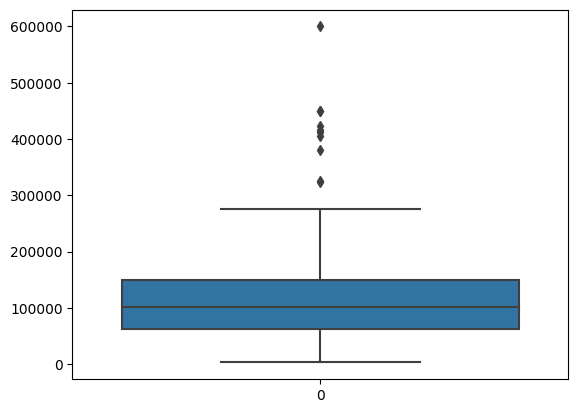

In [286]:
# importando a biblioteca seaborn
import seaborn as sns

# criando o gráfico
sns.boxplot(salarios_df['salary_in_usd'])

## 🔹 Outliers

Um outlier é um valor discrepante que possui um grande afastamento da maioria dos valores do conjunto de dados. Pode haver outliers com valores muito baixo ou valores muito alto, o importante é saber que esses valores são discrepante em relação a maioria dos dados.<br>

Entender os outliers é fundamental em uma análise de dados pelos seguintes aspectos:

- Viesar a sua análise: os outliers podem viesar todo o resultado de uma análise.<br>
- Mostrar erros de entrada: por exemplo, a idade de uma pessoa é de 550 anos.<br>  
- O comportamento dos outliers pode ser justamente o que está sendo procurado: um aluno que só tira 10, alguem que sempre ganha sorteios, possiveis fraudes.<br><br>

### Como encontrar os outliers?
Os estatísticos desenvolveram diversas maneiras do que pode e o que não pode ser considerado um outlier. Uma regra bastante utilizada afirma que todo valor é um outlier se ele for menor que **Q1 - 1.5 * IIQ** ou se ele for maior que **Q3 + 1.5 * IIQ**.

**Q1**: Primeiro quartil<br>
**Q3**: Terceiro quartil<br>
**1.5**: Um valor escolhido pelo concenso de estatísticos.<br>
**IIQ**: Intervalo interquartil<br><BR>

    
### Observação
Quando formos criar um boxplot e escolhermos mostrar os outliers do dataset, o indicador de minimo e o indicador de máximo do dataset passarão a ser defido pelas 2 formulas que calculam os outliers.<br>

**minimo** = Q1 - 1.5 * IIQ<br>
**maximo** = Q3 + 1.5 * IIQ<br><br>


## 🔹 Coeficientes de correlação


A estatística permite ampliar nosso entendimento sobre os fenômemos observados no dia a dia. E uma de suas maiores contribuições para a cieência foi a sua capacidade de medir a relação entre diferentes variáveis, por meio do coeficiente de correlação.

O meu intuito nesse estudo é mostrar quais são os principais coeficientes de, como podemos cálcula-los e quando cada um deles deve ser utilizado.


### O que são os coeficientes correlação?
Os coeficientes de correlação são métodos estatísticos para **medir as relações** entre variáveis e o que elas representam, por exemplo, eles podem ser usados para mostrar a associação entre a taxa de desemprego e o indice de criminalidade ou a taxa de poluição do ar com indice de problemas respiratórios.

A correlação procura entender 2 coisas:

**1°**- Como uma variável se comporta em um cenário onde outra está variando.<br>
**2°**- Sexiste alguma relação entre a variabilidade de ambas.

Ou seja, elas permitem avaliar o que acontece com uma variável **X** enquanto outra variável **Y** aumenta ou diminui. Os coeficientes visam quantificar essa relação, eles variam de **-1 a 1**. E são fundamentais para compreender cenários com muitas variáveis relacionadas.


O coeficiente de correlação nos informa 2 coisas:

**1° O sentido da correlação**: quando o valor do coeficiente de correlação está entre **0 e 1**, dizemos que há uma relação positiva, ou seja conforme uma variável aumenta a outra aumenta também. Já quando um valor do coeficiente de correlação estiver entre **-1 e 0**, dizemos que há um relação negativa ou inversa, nesse caso quando o valor de uma variável aumenta a outra diminui.

**2° A intensidade da correlação**: quanto mais próximo de **1 ou -1** for o valor do coeficiente de correlação, dizemos que há uma relação forte entre as variáveis. Já quanto mais próximo de **0** for o coeficiente de correlação, dizemos que não há uma relação significativa entre as variáveis ou simplesmente não há nenhuma relação, mas atenção é possivel que exista uma correlação não linear. 

Uma vez que é muito dificil lidarmos com correlações perfeitas, você encontrará dirversos valores de refências, para auxiliar na interpretação do coeficiente de correlação. Essas categorias podem variar de acordo com o referencial adotado ou o campo de estudo, mas veja abaixo uma referencia de valores bastante utilizados.

**Correlação muito fraca**: entre ( 0 e 0.2 ) ou ( 0 e -0.2 ) <br>
**Fraca**: entre ( 0.2 e 0.4 ) ou ( -0.2 e -0.4 )<br>
**Moderada**: entre ( 0.4 e 0.6 ) ou ( -0.4 e -0.6 ) <br>
**Forte**: entre ( 0.6 e 0.8 ) ou ( -0.6 e -0.8 )<br>
**Muito forte**: entre ( 0.8 e 1 ) ou ( -0.8 e -1 )<br> 

A correlação não possui unidade de medida. Ou seja, se você mudar a unidade de medida das variáveis, a correlação não muda. Por exemplo, alterar a unidade de medida de Fahrenheit para Celsius não afetará a correlação da temperatura com outras variáveis.


### Os 3 coeficientes de correlação mais usados
Neste estudo iremos falar dos coeficientes de pearson, de spearman e o de kandall. Dependendo do tipo das variáveis e da forma como elas se comportam, um coeficiente de correlação poderá ser mais adequado do que os outros.


### Coeficiente de correlação de Pearson
O coeficiente de correlação de Pearson, também chamado de **Correlação linear** ou **R de Pearson** é uma medida de associação linear entre duas variáveis quantitativas. Desenvolvido por Karl Pearson e Francis Galton, esse coeficiente mensura a direção e o grau de uma relação entre as variáveis.

O **R de Pearson** exige que as duas variáveis possuam uma distribuição normal dos dados. Pois esse coeficiente é muito sensivel a valores extremos, os famosos **outliers**. Esse valores são capazes de mudar consideravelmente o coeficiente. Por isso, indentifique esses valores e trate eles para que possam entrar no cálculo ou simplismente os exclua. Ou melhor use o proximo coeficiente do qual falaremos.

A formula para cálcular o coeficiente de Pearson segue abaixo.<br>

<img src='https://static.significados.com.br/foto/equacao-correlacao-etapa-6.png' width='500'>

**r**: coeficiente de correlação de Pearson.<br>
**n**: numeros de pares (x, y) que temos.<br>
**∑xy**: multiplicamos cada **x** por seu respectivo **y** e somamos os resultados. <br>
**∑x**: somatório de todos os valores de **x**.<br>
**∑y**: somatório de todos os valores de **y**.<br>
**∑x²**: elevamos todos os valores de **x** ao quadrado e somamos todos os resultados. <br>
**∑y²**: elevamos todos os valores de **y** ao quadrado e somamos todos os resultados. <br>

No entanto, não precisamos fazer todo esse cáculo, pois o pandas nos oferece o método **corr()** que faz isso por nós. Vale lembrar que estudar a formula fará com que nós posssamos entender melhor o coeficiente, então estude.


### Coeficiente de correlação de Spearman
Denominado pela letra grega **ρ** (RHÔ), o coeficiente de Spearman é uma medida de correlação não paramétrica. Ele não requer que as variáveis tenham distribuição normal e pode inclusive verificar a relação entre variáveis qualitativas ordinais.

Então, o coeficiente de correlação de Spearman serve para casos em que você tem queira fazer uma correlação entre:

- **Variável quantitativa** (com distribuição normal) e **Variável quantitativa** (sem distribuição normal)
- **Variável quantitativa** (sem distribuição normal) e **Variável quantitativa** (sem distribuição normal)
- **Variável quantitativa** (não importa a distribuição dos dados) e **Variável qualitativa ordinal**
- **Variável qualitativa ordinal** e **Variável qualitativa ordinal**

A formula para cálcular o coeficiente de Spearman segue abaixo.<br>

<img src='https://www.questionpro.com/blog/wp-content/uploads/2019/05/3.png' width='400' style='float:left'>

**r**: coeficiente de correlação de Spearman.<br>
**n**: numeros de pares (x, y) que temos.<br>
**∑d²**: é a diferença entre os dois postos de cada observação elevado ao quadrado e depois feito o somatório dos resultados.


### Coeficiente de correlação de Kendall

Espressa pela letra grega **τ** (TAU), o coeficiente de correlação de Spearman é uma medida de associação para variáveis qualitativas ordinais que possuem uma amostra pequena ou muitos dados que se repetem. Uma vantagem desse coeficiente, é a possibilidade de ser generalizado para um coeficiente de correlação parcial.


### Coeficiente de correlação + Gráfico de dispersão
Como vimos, os coeficientes de correlação são métodos muito úteis para enteder melhor a relação entre variáveis. No entanto, há situações em que o coeficiente de correlação meio que esconde algumas informações. Por exemplo, após cálcular o coeficiente de correlação entre 2 variáveis obtemos o valor 0.32, e nesse momento acreditamos que essas variáveis não tem uma correlação significativa, porém ao usarmos o gráfico de dispersão para analisar os dados de forma estratificada percebemos que existe um grupo com caracteristicas em comum que tem uma forte correlação entre as variáveis.

Ou seja, as vezes podem existir situações que o coeficiente de correlação pode nos levar ao erro. Por isso usar o coeficiente de correlação e o gráfico de dispersão em conjunto nos possibilita um melhor entendimento dos dados.

## 🔹 Gráficos de dispersão

O **gráfico de dispersão** é uma ferramenta gráfica que permite visualizarmos com clareza a correlação entre duas variáveis. Muito utilizado como uma ferramenta de qualidade o diagrama aponta tendências e padrões.

Frequentemente é desejável determinar se existe uma relação ou associação entre duas variáveis. Por exemplo, uma vez que um **diagrama de causa e efeito** tenha sido desenvolvido para identificar causas potenciais que tenham impacto na qualidade de um produto ou processo, a relação entre as causas e a qualidade desse produto ou processo devem ser estudadas. Os resultados desses estudos devem ajudar a determinar quais as melhores atitudes a serem tomadas. Uma ferramenta poderosa para estudar tais relações é o gráfico de dispersão.

O gráfico de dispersão além de mostrar a correlação entre variáveis, também destaca pontos fora da curva, ou seja, aqueles que estão longe da tendência do gráfico, e que podem ser objeto de investigação para compreender melhor os dados.
<br>


### Como analisar um gráfico de dispersão?

Cada ponto do gráfico de dispersão está associado a uma coordenada (x, y). Em geral nos gráficos, as variáveis independentes são representadas no eixo orizontal (x) e as dependente no eixo vertical (y).

<img src='https://wikiciencias.casadasciencias.org/wiki/images/4/47/Img_Diagrama_ou_gr%C3%A1fico_de_dispers%C3%A3o_Grafico_2.png' width='30%' style="float:left">
<br><br><br><br><br><br><br><br><br><br><br><br><br>

Quando vemos um gráfico de dispersão que mostra uma correlação razoável, boa ou má entre as variáveis, e tentamos inferir algo com base no que o gráfico mostra, estamos cometendo um erro potencialmente perigoso pois a correlação não implica necessariamente em causalidade. Essa relação pode ser causada por algo bastante diferente. Por isso quando construimos um gráfico de tendências, procuramos identificar relações potenciais, que deverão ser comprovadas em experimentos posteriores.
<br>


### Quais as possiveis correlações a serem identificadas em um gráfico de dispersão?

**Sem correlação**: quando vemos apenas uma nuvem de pontos no gráfico, podemos dizer num primeiro momento que não há uma correlação direta entre a variável **x** e **y**. Só teremos certeza que não há correlação entre as variáveis após testes.

<img src='https://site.moki.com.br/wp-content/uploads/2022/02/diagrama-de-dispersao-correlacao-nula-e1645458197814.png' style="float:left">
<br><br><br><br><br><br><br><br><br><br>

**Correlação positiva forte**: há uma clara tendência nos dados. Quando a variável **x** aumenta é esperado conjuntamente um aumento na variável **y**. A pouca dispersão dos dados indica que essa tendência é forte. Mas como dito antes, só poderemos ter certeza de uma relação causa e efeito após testes.

<img src='https://site.moki.com.br/wp-content/uploads/2022/02/diagrama-de-dispersao-correlacao-forte-e1645458405374.png' style="float:left">
<br><br><br><br><br><br><br><br><br><br>

**Correlação positiva fraca**: quando a variável **x** sobe a variável **y** tende a subir também. No entanto a dispersão maior dos dados indica que mais variáveis podem estar envolvidas. Adicionar outras variáveis, como variáveis de estratificação ou testar novas variáveis podem ser boas estratéfias para entender melhor a correlação entre os dados.

<img src='https://site.moki.com.br/wp-content/uploads/2022/02/diagrama-de-dispersao-correlacao-fraca-e1645458334895.png' style="float:left">
<br><br><br><br><br><br><br><br><br><br>

**Correlação negativa forte**: análogo a correlação positiva forte, só que quando **x** aumenta, **y** diminui.

<img src='https://site.moki.com.br/wp-content/uploads/2022/02/diagrama-de-dispersao-correlacao-negativa-e1645457874717.png' style="float:left">
<br><br><br><br><br><br><br><br><br><br>

**Correlação negativa fraca**: análogo a correlação positiva média, porém quando **x** aumenta, **y** diminui.

<img src='https://blog.proffernandamaciel.com.br/wp-content/uploads/2022/03/Negativa-fraca-300x195.png' style="float:left">
<br><br><br><br><br><br><br><br><br><br><br><br>


### Estratificação do gráfico de dispersão
Ao se preparar um gráfico de dispersão deve-se considerar o uso de estratificação dos dados por alguma caracteristica comum. Fazer essa processo de estratificação nos possibilita entender melhor os nossos dados.
<br><br>


### Resumo sobre o gráfico de dispersão
**Primeiro**, o gráfico de dispersão é usado para examinar a relação entre duas variáveis quantitativas.

**Segundo**, o gráfico de dispersão nos permite enxergar padrões fora do comum, dados afetados por causas especiais e agrupamentos interessante de ponto de dados.

**Terceiro**, se existir uma associação entre duas variáveis, a variável independente e a variável dependente, isso não significa que existe necessariamente uma relação de causa e efeito. A correlação apenas nos diz a força e a direção do relacionamento entre vairáveis, mas nada esclarece os motivos desse relacionamento. Por outro lado se não existir nenhuma correlação entre as variáveis, isso não significa que elas não estejam relacionadas.

**Por fim**, a estratificação pode ser usada para aprimorar um gráfico de dispersão. Algumas vezes a relação entre variáveis não é evidente quando todos os dados são considerados, mas quando os dados são estratificados e plotados, a relação se torna mais clara.

# 🔺 Distribuição normal

## 🔹 Introdução

Parte de uma boa análise exploratória de dados é saber o tipo de distribuição que uma variável possui. Para então poder então escolher os métodos mais adequados para analisarmos nossa variável. Por exemplo:<br><br>

> Se nossa variável possui uma distribuição normal, devemos analisa-la através dos testes paramétricos:
> - **Teste T**
> - **Tukey**
> - **ANOVA**
> - **Teste de correlação de Pearson**
> - **etc** 


>Já se nossa variável não possuir uma distribuição normal, devemos analisa-la através dos testes não paramétricos:
> - **Teste de correlação de Spearman**
> - **Teste de correlação de Kendall**
> - **Wilcoxon ou Mann-Whitney**
> - **Kruskal Wallis**
> - **etc**

<br>

## 🔹 O que é uma distribuição normal?

Uma distribuição é considerada **normal** porque a maioria dos valores estão proximo á média da variável e poucos valores muito baixos e poucos valores muitos altos como mostra a imagem abaixo.

<img src='https://aprenderdatascience.com/wp-content/uploads/2020/08/imag2.png' style='float:left' width=600>

Quanto maior for a quantidade de dados, maior a tendência de termos uma distribuição normal. No mundo temos muitos fenômenos aleatórios que tem um comportamento de uma distribuição normal, como por exemplo, a altura ou o peso das pessoas de um país. Algumas características dessa distribuição:

- Formato de sino;
- Simétrica ou próxima a um formato simétrico;
- Unimodal;
- Apresenta valores iguais ou próximos para a Média e a Mediana;
- Os valores da distribuição tendem a zero ao se afastarem da Média.


Além disso uma distribuição ser normal significa que podemos calcular a quantidade de dados dentro de um intervalo criado com base no **desvio padrão** e a **média**. A imagem abaixo mostra que se pegarmos a média da nossa variável e subtrairmos ou somarmos **n** vezes o desvio padrão, nós iremos obter em porcentagem a quantidade de dados que se encontra dentro desse intervalo. Note que o intervalo formado pela **μ-σ** e **μ+σ** contém 68% dos dados de uma distribuição normal.

<img src='https://www.inf.ufsc.br/~andre.zibetti/probabilidade/figures/normal.PNG' style='float:left' width='590'>

## 🔹 Como saber se uma variável tem distribuição normal?

Declarar se uma váriável possui uma distribuição normal não é tão simples, por isso devemos utilizar vários métodos que nos levaram a essa conclusão. Os métodos que vamos ver nesse tutorial são  Histograma, Boxplot, Quantil-Quantil Plot, testes de Shapiro-Wilk, Kolmogorov Smirnov(Lilliefors) e Anderson-Darling.

### 🔶 Importando as libs e o dataset

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors as lillie
sns.set()

In [83]:
df = pd.read_csv('base-de-dados/dados.csv')

### 🔶 Histograma

Com base no que aprendemos sobre o histograma iremos analisar a variável **Altura** com o intuito de descobrir se as caracteristicas de uma distribuição normal se aplicam a essa variável.

Text(0, 0.5, 'Quantidade')

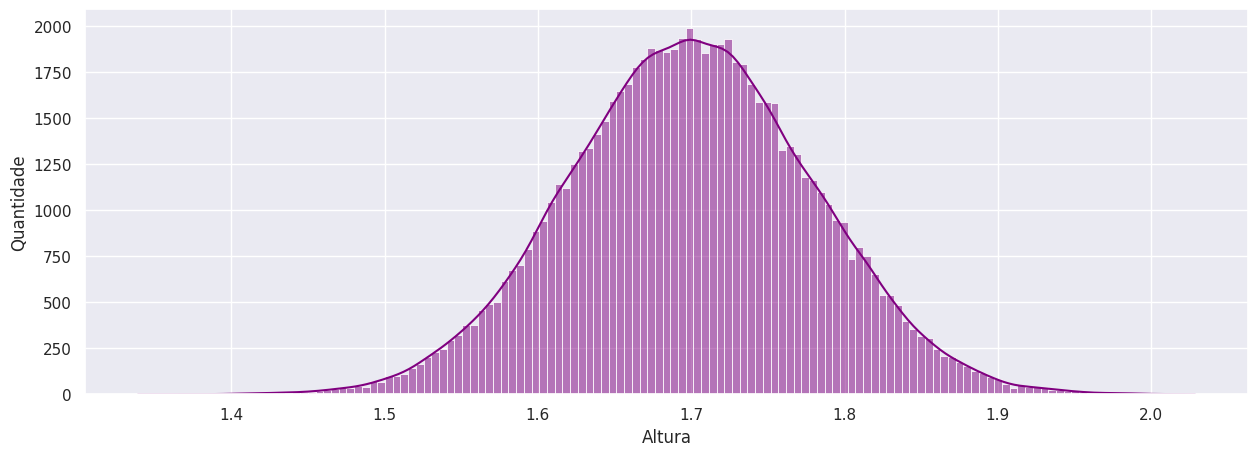

In [14]:
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x='Altura', kde=True, color='purple')
plt.ylabel('Quantidade')

Agora vamos descobrir se a média, moda e median são iguais ou bem próximas.

In [14]:
print(df['Altura'].mode().mean())
print(df['Altura'].median())
print(df['Altura'].mean())

1.7066552394444445
1.6993247325
1.6995124540575741


**OBS:**

- Podemos observar que a distirbuição não é unimodal, no entanto a média das modas é praticamente igual a mediana e a média da variável Altura.
- A distribuição pussui um formato de sino, caracteristica essa de uma distribuição normal como vimos.
- A distribuição é quase 100% simétrica.

Com base no que aprendemos sobre que é uma distribuição normal e quais as suas principais caracteristicas nós podemos dizer que temos uma distribuição normal. No entanto vamos usar os outros métodos para poder ter certeza.

### 🔶 Boxplot

Um boxplot nada mais é que um Histograma visto de cima. No entanto, um boxplot nos dá mais informações sobre a distribuição dos dados.

<AxesSubplot: title={'center': 'BOXPLOT DOS VALORES DA ALTURA'}, xlabel='Altura'>

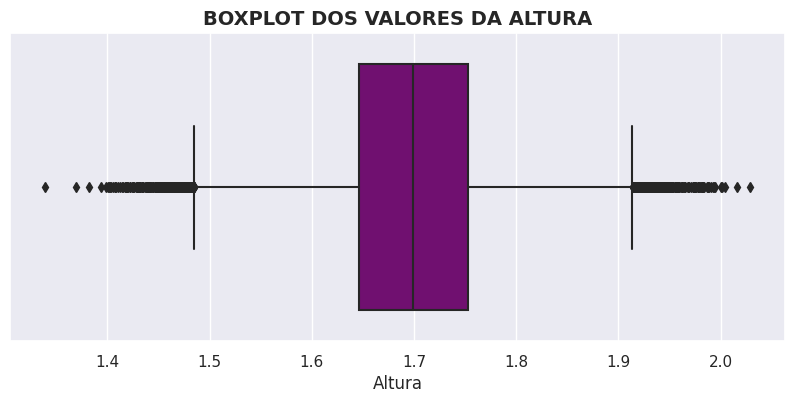

In [16]:
plt.figure(figsize=(10,4))
plt.title('BOXPLOT DOS VALORES DA ALTURA', fontsize=14, fontweight='bold')
sns.boxplot(x='Altura', data=df, color='purple')

**OBS:**
- Uma distribuição representada por um boxplot tem sua caixa muito proximo ao centro e é o que vemos no nosso boxplot.
- Podemos observar também que existe uma simetria quase que perfeita ao comparar o primeiro lado do gráfico (o lado antes da mediana) com o segundo lado do gráfico (o lado após a mediana).

Esse gráfico só fortalece o que já descobrimos através do histograma.

### 🔶 QQ Plot

O QQ-plot é uma ferramenta gráfica que dentre suas funções ele nos auxilia na verificação de uma distribuição normal. É mais eficiente que o BoxPlot e o Histograma. O QQ-Plot faz uma comparação entre quantis teóricos de uma distribuição normal e os quantis da nossa variável. 

Text(0.5, 1.0, 'NORMAL QQ PLOT')

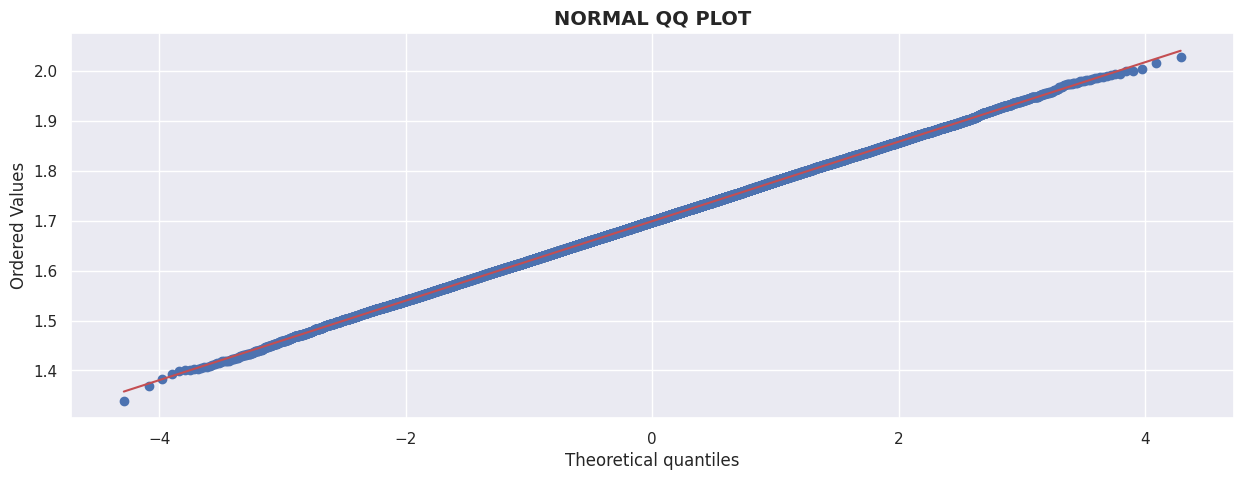

In [18]:
# Criando um qq-plot
plt.figure(figsize=(15,5))
stats.probplot(df['Altura'], dist='norm', plot=plt)
plt.title('NORMAL QQ PLOT', fontsize=14, fontweight='bold')

A reta vermelha representa como os nossos dados deveriam estar distribuidos caso nossa variável possuisse uma distribuição normal. Os pontos em azul demonstram como a nossa variável realmente está distribuida. Ou seja, quanto mais próximo os pontos em azul estiverem da linha vermelha maior será a chance da nossa variável pussuir uma distribuição normal.

<br>

**OBS:**
- No gráfico acima é possivel notar que a nossa variável praticamente tem uma distribuição normal. Apenas os pontos extremos apresentam uma pequena distância da linha vermelha.

### 🔶 Shapiro-Wilk



Seguindo adiante vamos utilizar o teste statistico Shapiro-wilk para poder descobrir a normalidade de uma distribuição. Esse método nos retorna dois valores, o resultado do cáculo do shapiro-wilk e o p-valor. Vamos utilizar o pvalue para validar uma das hipoteses abaixo:

Ho = distribuição normal se p>0.05<br>
Ha = distribuição não normal se p<=0.05

In [102]:
statistica, pvalue = stats.shapiro(df['Altura'])

print(pvalue)

0.6376791596412659


/home/audax/Projetos/estudo/venv-estudo/lib64/python3.11/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**OBS:**
- Podemos perceber que esse teste não é tão preciso para conjuntos de dados que possuem mais de 5000 mil dados.
- O pvalue é maior do que 0.05, o que nos indica que provavelmente essa distribuição é normal. 

### 🔶 kolmogorov smirnov

O método kolmogorov smirnov é mais um utilizado para saber se uma distribuição é ou não normal. O mesmo raciocinio das hipoteses se aplica nesse método. <br>

Vamos utilizar o pvalue para validar uma das hipoteses abaixo:

Ho = distribuição normal se p>0.05<br>
Ha = distribuição não normal se p<=0.05


In [103]:
statistica, pvalue = lillie(df['Altura'], dist='norm')

print(pvalue)

0.36570836798072737


**OBS:**
- O pvalue é maior do que 0.05, o que nos indica que provavelmente essa distribuição é normal. 

### 🔶 Resumo

Depois de passar por todas essas formas de testar se uma distribuição é ou não normal, vemos que em todos as formar utilizadas a variável altura foi considerada normal, logo podemos concluir que realmente essa variável possui uma distribuição normal.